In [79]:
library(igraph);

In [80]:
#install.packages("ggplot2")
library("ggplot2");

In [81]:
library(dplyr);

In [137]:
library(threejs);

In [82]:
#vertices, edges
amzn_g <- read.graph('Amazon graph.txt', format = 'gml')
amzn_g

IGRAPH 5f89c6d DN-- 10245 10754 -- 
+ attr: id (v/n), name (v/c)
+ edges from 5f89c6d (vertex names):
 [1] 44  ->42   179 ->71   410 ->730  415 ->741  656 ->1267 669 ->672 
 [7] 672 ->669  689 ->690  689 ->1284 690 ->689  690 ->1284 730 ->410 
[13] 741 ->909  786 ->1767 802 ->806  806 ->802  856 ->205  857 ->211 
[19] 867 ->866  868 ->866  909 ->741  911 ->748  921 ->190  1015->151 
[25] 1016->1015 1047->1049 1049->1047 1204->1491 1267->656  1272->669 
[31] 1278->152  1282->943  1284->689  1285->1286 1286->1285 1290->1293
[37] 1293->1290 1293->1606 1294->1295 1295->1294 1312->730  1350->2783
[43] 1362->156  1366->190  1438->1580 1438->1581 1467->3996 1479->158 
+ ... omitted several edges

In [83]:
vcount(amzn_g)
ecount(amzn_g)

[1] 10245

[1] 10754

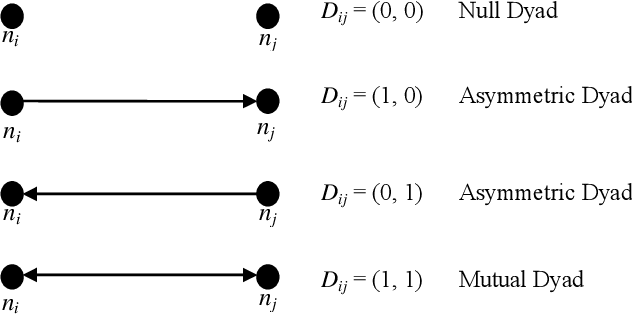

In [84]:
# Perform dyad census
dyad_census(amzn_g)

$mut
[1] 3199

$asym
[1] 4356

$null
[1] 52467335

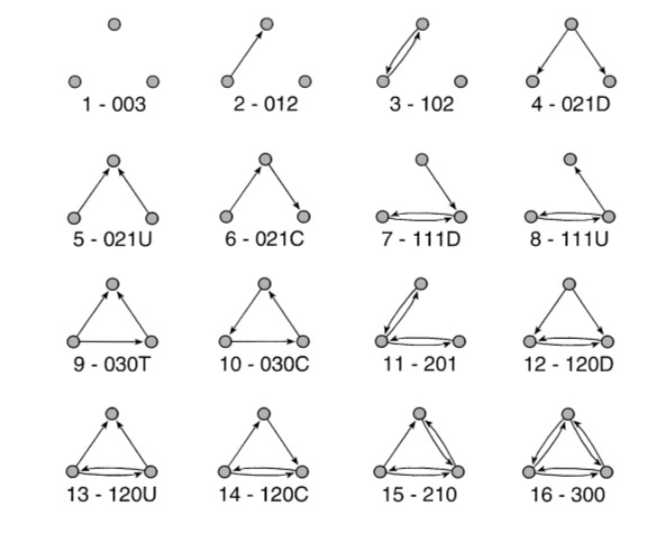

In [85]:
# Perform triad census - Output per row 
triad_census(amzn_g)

[1] 179089386743     44610360     32763436          215         1906
 [6]          507         1198          457          118            0
[11]          301          170          119           33          239
[16]          288

In [86]:
# Find the edge density
edge_density(amzn_g)

[1] 0.0001024681

In [87]:
# From previous steps
actual_recip <- reciprocity(amzn_g)
n_nodes <- gorder(amzn_g)
edge_dens <- edge_density(amzn_g)
simulated_recip <- rep(NA, 1000)
for(i in 1:1000) {
  simulated_graph <- erdos.renyi.game(n_nodes, edge_dens, directed = TRUE)
  simulated_recip[i] <- reciprocity(simulated_graph)
}

# Reciprocity of the original graph
actual_recip

# Calculate quantile of simulated reciprocity
quantile(simulated_recip , c(0.025,0.5,0.975))

[1] 0.5949414

2.5%          50%        97.5% 
0.0000000000 0.0000000000 0.0003775081

 A place to start might be to look for "important products", e.g. those products that someone purchases and then purchases something else.An "important product" is (something that has > X out degrees and < Z in degrees

In [88]:
# Calculate the "out" degrees
out_degree <- degree(amzn_g, mode = "out")

## ... and "in" degrees
in_degree <- degree(amzn_g, mode = "in")

# See the distribution of out_degree
table(out_degree)

## ... and of in_degree
table(in_degree)


out_degree
   0    1    2    3    4    5 
1899 6350 1635  313   45    3 

in_degree
   0    1    2    3    4    5    6    7    8    9   11   12   17 
2798 5240 1549  424  139   50   20    7    9    5    1    2    1 

In [89]:
# From previous step
out_degree <- degree(amzn_g, mode = "out")
in_degree <- degree(amzn_g, mode = "in")

# Create condition of out degree greater than 3
# and in degree less than 3
is_important <- out_degree>3 & in_degree<3

# Subset vertices by is_important
imp_prod <- V(amzn_g)[is_important]

# Output the vertices
print(imp_prod)

+ 8/10245 vertices, named, from 5f89c6d:
[1] 1629   4545   6334   20181  62482  64344  155513 221085


Color the edges blue for high ranking (1, 2, 3) to low ranking (20, 21, 22) and red for the opposite. If rank is correlated with downstream purchasing (meaning that higher ranked products are more likely to result in purchases), then we'll see mostly blue links. 

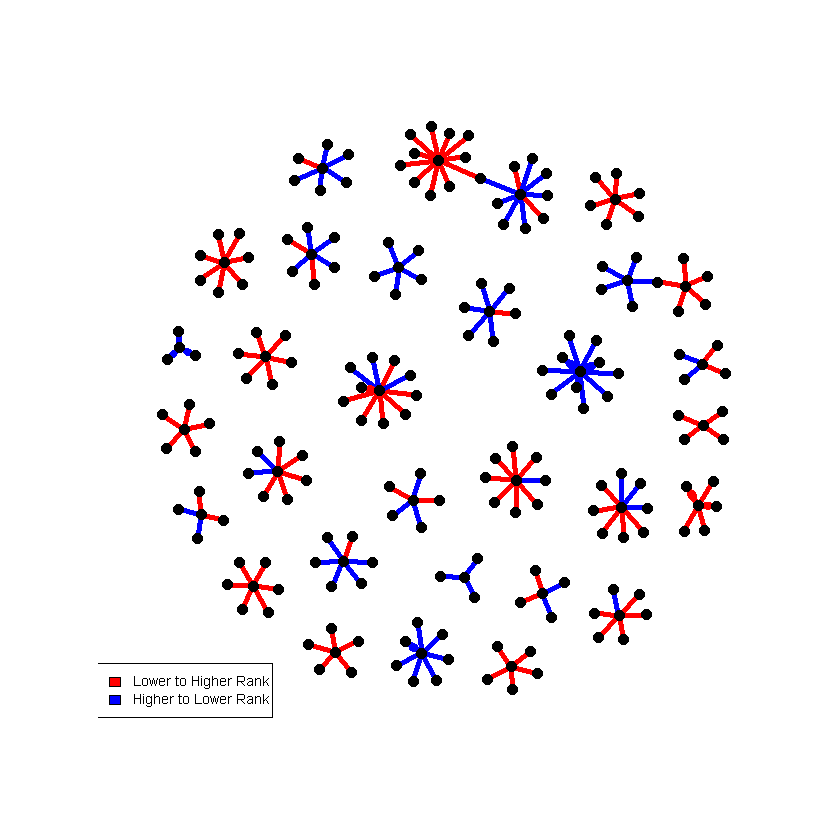

In [90]:
ip_df <- read.csv("ip_df.csv")

# Select the from and to columns from ip_df
ip_df_from_to <- ip_df[c("from","to")]

# Create a directed graph from the data frame
ip_g <- graph_from_data_frame(ip_df_from_to, directed = TRUE)

# Set the edge color. If salesrank.from is less than or 
# equal to salesrank.to then blue else red.
edge_color <- ifelse(
  ip_df$salesrank.from <= ip_df$salesrank.to, 
  yes = "blue", 
  no = "red"
)

# From previous step
ip_df_from_to <- ip_df[c('from','to')]
ip_g <- graph_from_data_frame(ip_df_from_to, directed = TRUE)

edge_color <- ifelse(
  ip_df$salesrank.from <= ip_df$salesrank.to, "blue", "red"
)

plot(
  # Plot a graph of ip_g
  ip_g, 
  # Set the edge color
  edge.color = edge_color,
  edge.arrow.width = 1, edge.arrow.size = 0, edge.width = 4, 
  vertex.label = NA, vertex.size = 4, vertex.color = "black"
)
legend(
  "bottomleft", 
  # Set the edge color using edge_color
  fill = unique(edge_color), 
  legend = c("Lower to Higher Rank", "Higher to Lower Rank"), cex = 0.7
)

In [145]:
graphjs(
  # Plot a graph of ip_g
  ip_g, 
  # Set the edge color
  edge.color = edge_color,
  edge.arrow.width = 1, edge.arrow.size = 0, edge.width = 4, 
  vertex.label = NA, vertex.size = 0.25, vertex.color = "black"
)

HTML widgets cannot be represented in plain text (need html)

### Exploring temporal structure

In [91]:
time_graph = readRDS("time_graph.rds")
time_graph[1]

[[1]]
IGRAPH 38ecae2 DN-- 126 96 -- 
+ attr: name (v/c)
+ edges from 38ecae2 (vertex names):
 [1] 1629 ->190    1629 ->1366   1629 ->2679   1629 ->4023   11163->11124 
 [6] 11163->15360  11163->20175  32129->23842  32129->23843  32129->24115 
[11] 38131->44848  38131->44849  38131->44850  45282->10920  45282->20178 
[16] 45282->20179  52831->2134   52831->2136   52831->4119   53591->120083
[21] 53591->120085 53591->120086 56427->1898   56427->10076  56427->15800 
[26] 59706->63836  59706->63837  59706->63838  62482->69497  62482->69498 
[31] 62482->69499  62482->69500  67038->58926  67038->58928  67038->64118 
[36] 71192->71190  71192->71380  71192->75384  77957->43543  77957->43546 
+ ... omitted several edges


In [92]:
d <- as.Date(c("2003-03-02", "2003-03-12", "2003-05-05", "2003-06-01"))
# Loop over time graphs calculating out degree
degree_count_list <- lapply(time_graph,degree, mode = "out")

# Flatten it
degree_count_flat <- unlist(degree_count_list)

degree_data <- data.frame(
  # Use the flattened counts
  degree_count = degree_count_flat,
  # Use the names of the flattened counts
  vertex_name = names(degree_count_flat),
  # Repeat the dates by the lengths of the count list
  date = rep(d, lengths(degree_count_list))
)

head(degree_data)

degree_count vertex_name date      
1 4            1629        2003-03-02
2 3            11163       2003-03-02
3 3            32129       2003-03-02
4 3            38131       2003-03-02
5 3            45282       2003-03-02
6 3            52831       2003-03-02

In [93]:
important_vertices <- c(1629, 132757, 117841)

important_degree_data <- degree_data[degree_data$vertex_name %in% important_vertices, ]
important_degree_data

degree_count vertex_name date      
1   4            1629        2003-03-02
15  3            117841      2003-03-02
17  3            132757      2003-03-02
127 1            1629        2003-03-12
136 3            117841      2003-03-12
138 5            132757      2003-03-12
176 2            1629        2003-05-05
185 1            117841      2003-05-05
187 4            132757      2003-05-05
241 4            1629        2003-06-01
251 3            117841      2003-06-01
252 2            132757      2003-06-01

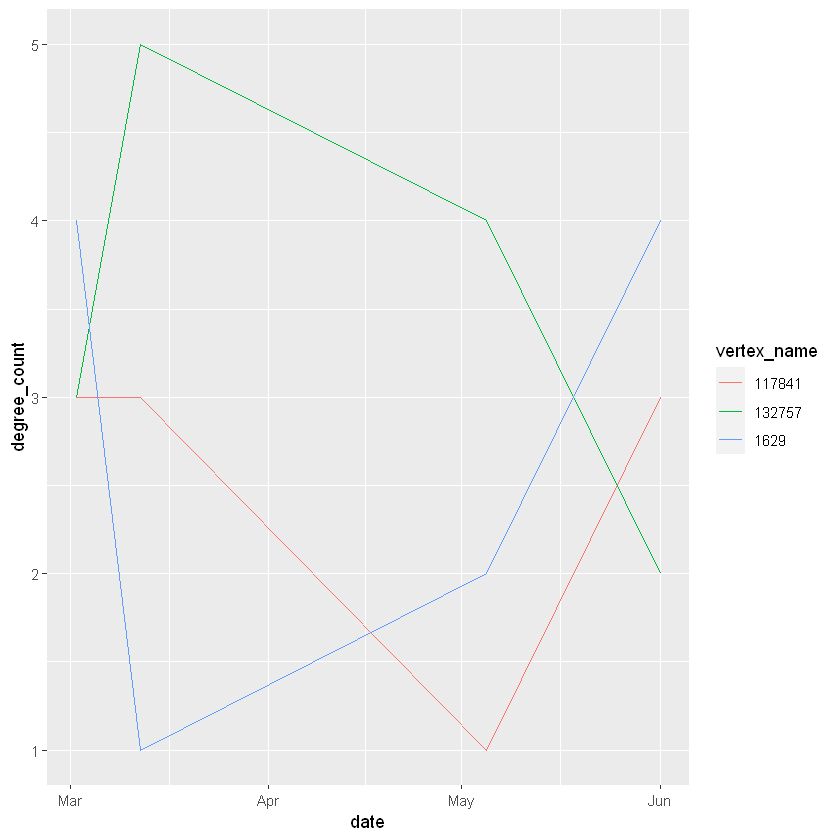

In [94]:
# Using important_degree_data, plot degree_count vs. date, colored by vertex_name 
ggplot(important_degree_data, aes(x = date, y = degree_count, color = vertex_name)) + 
  # Add a path layer
  geom_path()

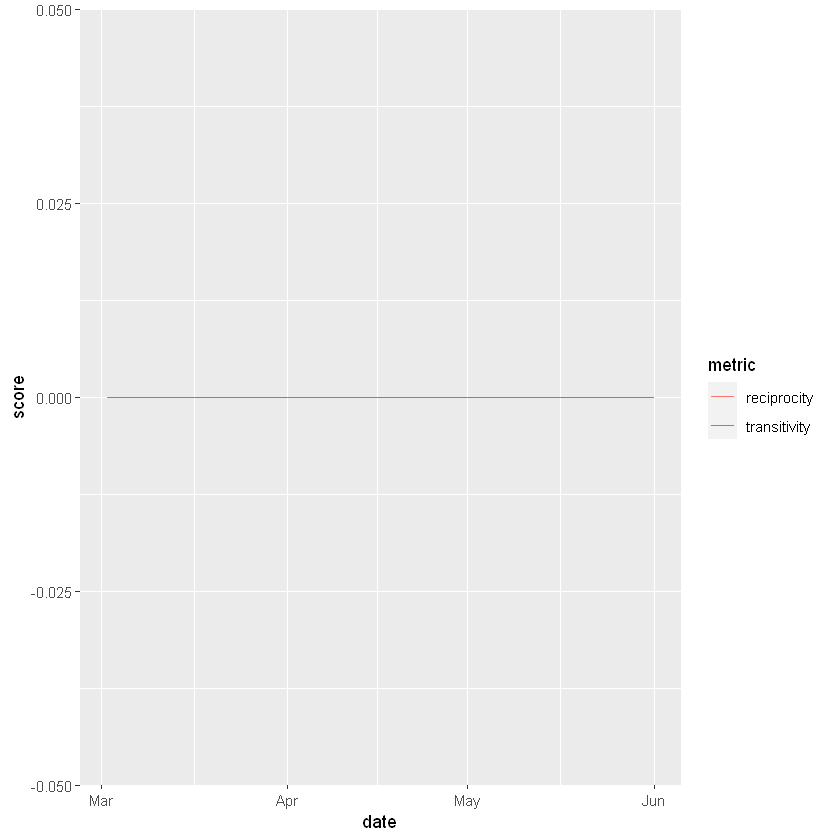

In [104]:
# From previous steps
transitivity_by_graph <- data.frame(
  date = d,
  metric = "transitivity",
  score = sapply(time_graph, transitivity)
)
reciprocity_by_graph <- data.frame(
  date = d,
  metric = "reciprocity",
  score = sapply(time_graph, reciprocity)
)
metrics_by_graph <- bind_rows(transitivity_by_graph, reciprocity_by_graph)

# Using metrics_by_graph, plot score  vs. date, colored by metric
ggplot(metrics_by_graph, aes(x = date, y = score, color = metric)) +
  # Add a path layer with geom_path()
  geom_path()

### Twitter Data 

In [113]:
retweet_graph <- read.graph('Twitter retweet graph.txt', format = 'gml')
retweet_graph

IGRAPH 60c5cd5 DN-- 4118 6052 -- 
+ attr: id (v/n), name (v/c)
+ edges from 60c5cd5 (vertex names):
 [1] thinkR_fr      ->thw_ch          thinkR_fr      ->omarwagih      
 [3] KJMillidine    ->Rbloggers       earino         ->d4tagirl       
 [5] ReecheshJC     ->KirkDBorne      SCMansbridge   ->rstudiotips    
 [7] DeepSingularity->gp_pulipaka     chrisderv      ->thinkR_fr      
 [9] chrisderv      ->_ColinFay       chrisderv      ->joshua_ulrich  
[11] mtrost2        ->romain_francois mtrost2        ->rstudiotips    
[13] mtrost2        ->RLangTip        dani_sola      ->rstudiotips    
[15] hrhotz         ->rstudiotips     hrhotz         ->cboettig       
+ ... omitted several edges

In [123]:
# Count the number of nodes in retweet_graph
gorder(retweet_graph)

# Count the number of edges in retweet_graph
gsize(retweet_graph)

# Calculate the graph density of retweet_graph
graph.density(retweet_graph)

[1] 4118

[1] 6052

[1] 0.00035697

In [175]:
#V(retweet_graph)$name[degree(retweet_graph) == 0]

E(retweet_graph)[[.inc('thinkR_fr')]]  

+ 57/6052 edges from 60c5cd5 (vertex names):
              tail      head  tid  hid
1        thinkR_fr    thw_ch    1 2268
2        thinkR_fr omarwagih    1 4089
3        chrisderv thinkR_fr    7    1
4     alevergara78 thinkR_fr   12    1
5        ma_salmon thinkR_fr   17    1
6       TodoenpcVE thinkR_fr   36    1
7          recleev thinkR_fr  106    1
8    artemklevtsov thinkR_fr  227    1
9        monkmanmh thinkR_fr  269    1
10      Pierre_Pgt thinkR_fr  320    1
11         sellorm thinkR_fr  339    1
12        DataTeka thinkR_fr  404    1
13  verajosemanuel thinkR_fr  413    1
14   JacekKotowski thinkR_fr  469    1
15       dpolychr2 thinkR_fr  479    1
16        Gen_Juju thinkR_fr  564    1
17       AntoViral thinkR_fr  660    1
18      GIS_Sharer thinkR_fr  772    1
19     MangoTheCat thinkR_fr  830    1
20       pacoramon thinkR_fr  917    1
21 maximaformacion thinkR_fr  923    1
22         privefl thinkR_fr  976    1
23    mhiggins2000 thinkR_fr  996    1
24       lecuacion 

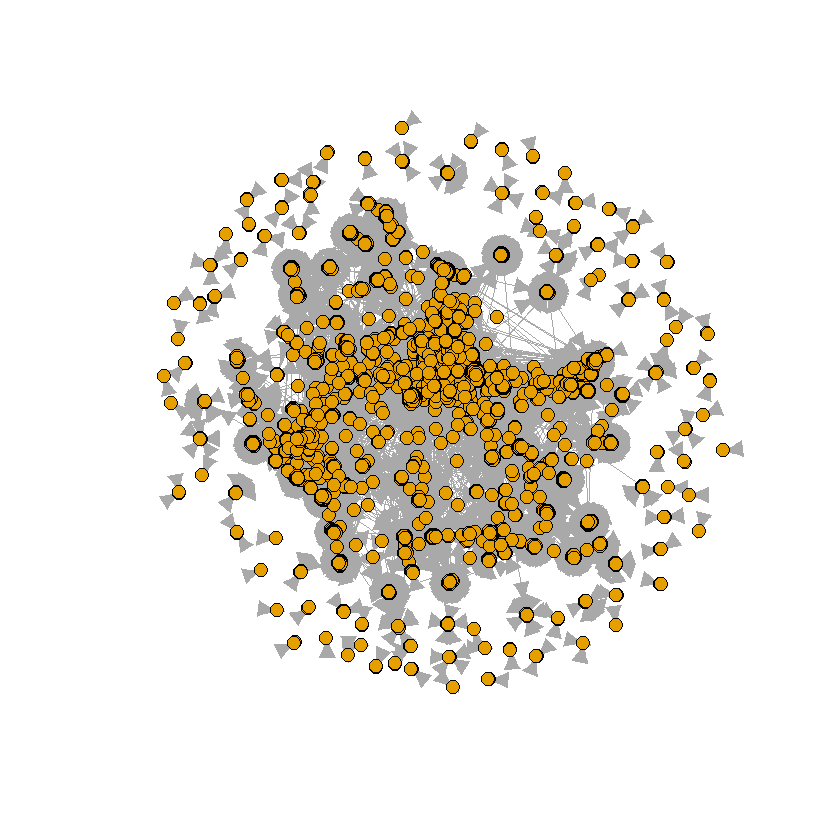

In [202]:
plot(retweet_graph, vertex.label = NA, vertex.size = 5)

In [224]:
DegreeNetwork <- induced_subgraph(retweet_graph, v = V(retweet_graph)$name[degree(retweet_graph) > 1])

graphjs(DegreeNetwork, edge.color = "black", vertex.size = 0.5)

HTML widgets cannot be represented in plain text (need html)

In [236]:
#Print the vertices by there degree
degree_seq <- sort(degree(retweet_graph, mode = "in"), decreasing = TRUE)
head(degree_seq, 15)

Rbloggers   rstudiotips          drob     dataandme    KirkDBorne 
          642           574           228           201           189 
     RLangTip hadleywickham   gp_pulipaka     _ColinFay  AchimZeileis 
          140           128           100            99            97 
   juliasilge     revodavid     ma_salmon   marcusborba      rOpenSci 
           93            92            63            62            61

In [225]:
# Make an ego graph
node_number = which(V(retweet_graph)$name == "dccc_phd")

g <- make_ego_graph(retweet_graph, nodes = node_number, order = 1)[[1]]

paste('Node number', node_number)
graphjs(g,  vertex.label = NA, edge.color = "black", vertex.size = 0.5)

[1] "Node number 839"

HTML widgets cannot be represented in plain text (need html)

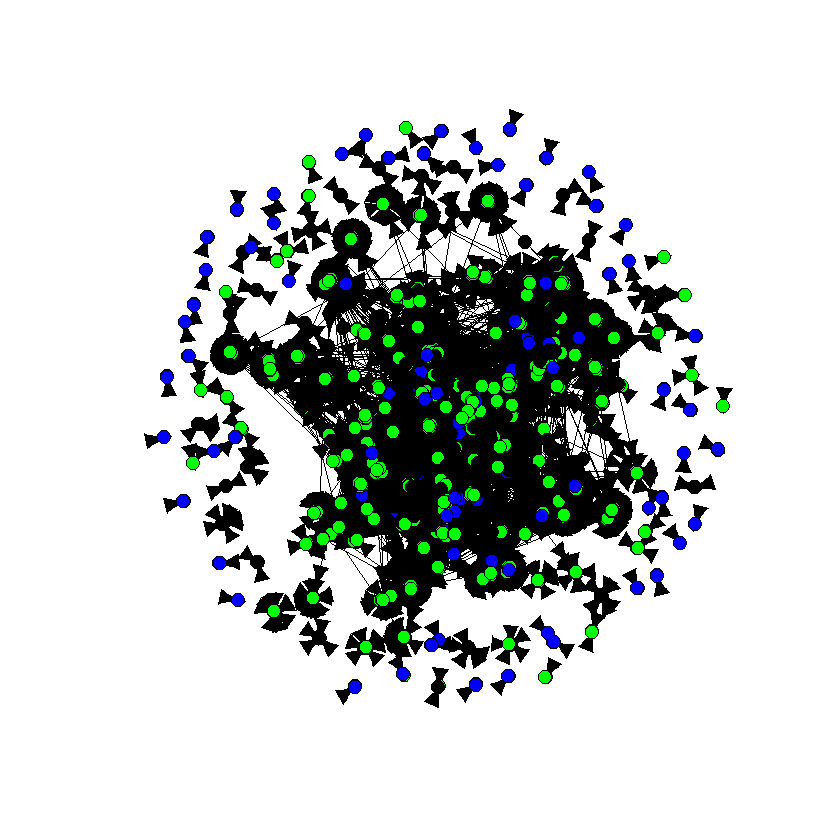

In [235]:
# From previous step
in_deg <- degree(retweet_graph, mode = "in")
out_deg <- degree(retweet_graph, mode = "out")
has_tweeted_once_never_retweeted <- in_deg == 1 & out_deg == 0
has_never_tweeted_retweeted_once <- in_deg == 0 & out_deg == 1

# The default color is set to black
vertex_colors <- rep("black", gorder(retweet_graph))

# Set the color of nodes that were retweeted just once to blue
vertex_colors[has_tweeted_once_never_retweeted] <- "blue"

# Set the color of nodes that were retweeters just once to green 
vertex_colors[has_never_tweeted_retweeted_once] <- "green"

plot(
    # Plot the network
    edge.color = "black",
    # Set the vertex colors to vertex_colors
    vertex.color = vertex_colors,
    vertex.label = NA, 
    vertex.size = 5
    )

### The distribution of centrality

In [238]:
# Calculate directed betweenness of vertices
retweet_btw <- betweenness(retweet_graph, directed = TRUE)

# Get a summary of retweet_btw
summary(retweet_btw)

# Calculate proportion of vertices with zero betweenness
mean(retweet_btw == 0)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0   109.4     0.0 69549.4 

[1] 0.9499757

In [239]:
# Calculate eigen-centrality using eigen_centrality()
retweet_ec <- eigen_centrality(retweet_graph, directed = TRUE)$vector

# Get a summary of retweet_ec
summary(retweet_ec)

# Calc proportion of vertices with eigen-centrality close to zero
almost_zero <- 1e-10
mean(retweet_ec < almost_zero)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.000000 0.006067 0.000000 1.000000 

[1] 0.9730452

In [243]:
# Get 0.99 quantile of betweenness 
betweenness_q99 <- quantile(retweet_btw, 0.99)

# Get top 1% of vertices by betweenness
top_btw <- retweet_btw[retweet_btw > betweenness_q99]

# Get 0.99 quantile of eigen-centrality
eigen_centrality_q99 <- quantile(retweet_ec,  0.99)

# Get top 1% of vertices by eigen-centrality
top_ec <-  retweet_ec[retweet_ec > eigen_centrality_q99]

# See the results as a data frame
data.frame(
  Rank = seq_along(top_btw), 
  Betweenness = names(sort(top_btw, decreasing = TRUE)), 
  EigenCentrality = names(sort(top_ec, decreasing = TRUE))
)

Rank Betweenness    EigenCentrality
1   1   hadleywickham  ma_salmon      
2   2   kierisi        rstudiotips    
3   3   drob           opencpu        
4   4   opencpu        AchimZeileis   
5   5   ma_salmon      dataandme      
6   6   rmflight       drob           
7   7   dataandme      _ColinFay      
8   8   _ColinFay      rOpenSci       
9   9   juliasilge     kearneymw      
10 10   revodavid      RobertMylesMc  
11 11   rOpenSci       ptrckprry      
12 12   nj_tierney     rmflight       
13 13   jonmcalder     thosjleeper    
14 14   Md_Harris      revodavid      
15 15   mauro_lepore   juliasilge     
16 16   sckottie       RLadiesGlobal  
17 17   RLadiesGlobal  hadleywickham  
18 18   kearneymw      mauro_lepore   
19 19   lenkiefer      JennyBryan     
20 20   NumFOCUS       tudosgar       
21 21   tjmahr         cboettig       
22 22   TheRealEveret  antuki13       
23 23   RLadiesMAD     jasdumas       
24 24   jasdumas       Rbloggers      
25 25   JennyBryan     rensa_co       
26 26   hrbrmstr       timtrice       
27 27   antuki13       daattali       
28 28   Voovarb        johnlray       
29 29   timtrice       joranelias     
30 30   thinkR_fr      StatsbyLopez   
31 31   benmarwick     kierisi        
32 32   RosanaFerrero  joshua_ulrich  
33 33   clquezadar     thinkR_fr      
34 34   drsimonj       ledell         
35 35   zentree        pssGuy         
36 36   thomasp85      bastistician   
37 37   OilGains       zentree        
38 38   yodacomplex    brookLYNevery1 
39 39   annakrystalli  Md_Harris      
40 40   davidhughjones sckottie       
41 41   noamross       jonmcalder     
42 42   AlexaLFH       nj_tierney

In [246]:
# Visualize the node with the highest betweeness 
node_number = which(V(retweet_graph)$name == "hadleywickham")

g <- make_ego_graph(retweet_graph, nodes = node_number, order = 1)[[1]]

paste('Node number', node_number)
graphjs(g,  vertex.label = NA, edge.color = "black", vertex.color = vertex_colors, vertex.size = 0.5)

[1] "Node number 254"

HTML widgets cannot be represented in plain text (need html)

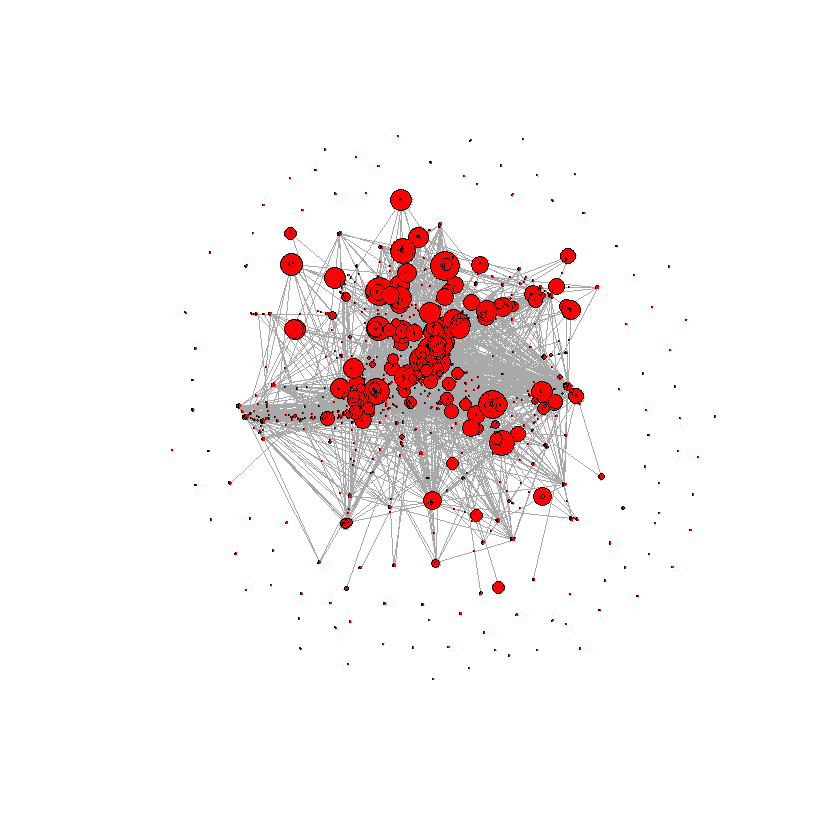

In [247]:
# Transform betweenness: add 2 then take natural log
transformed_btw <- log(retweet_btw + 2)

# Make transformed_btw the size attribute of the vertices
V(retweet_graph)$size <- transformed_btw

# Plot the graph
plot(retweet_graph,
  vertex.size=V(retweet_graph)$size, vertex.label = NA, edge.arrow.width = 0.2,
  edge.arrow.size = 0.0, vertex.color = "red"
)

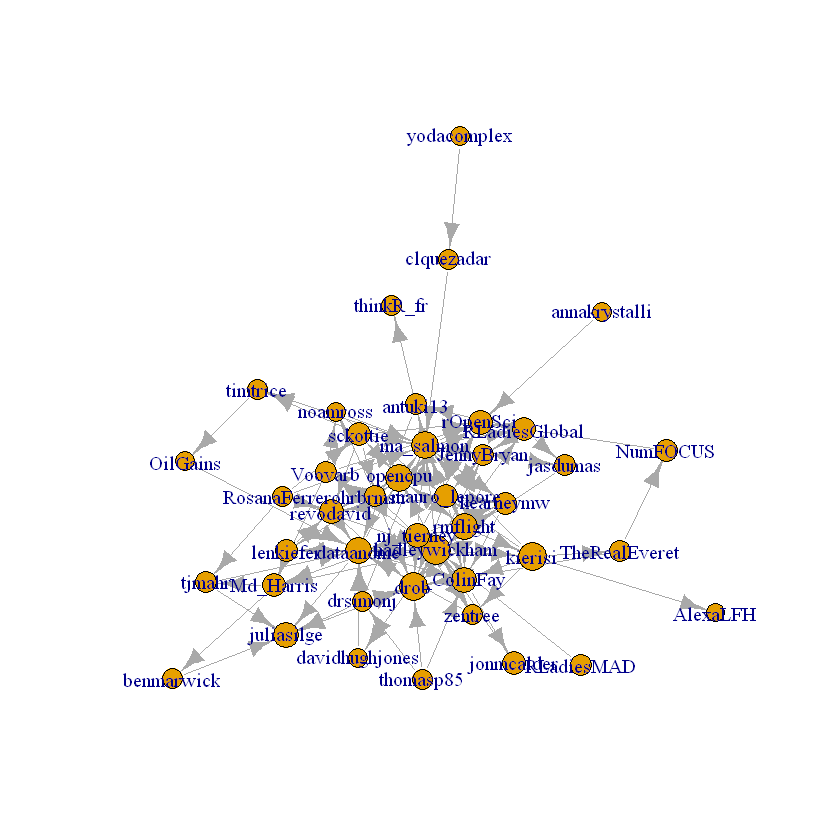

In [250]:
# Subset nodes for betweenness greater than 0.99 quantile
vertices_high_btw <- V(retweet_graph)[retweet_btw > betweenness_q99]

# Induce a subgraph of the vertices with high betweenness
retweet_subgraph <- induced_subgraph(retweet_graph, vertices_high_btw)

# Plot the subgraph
plot(retweet_subgraph)

### Tween Mentios 

In [252]:
mention_graph <- read.graph('Twitter mention graph.txt', format = 'gml')
mention_graph

IGRAPH 950215e DN-- 955 975 -- 
+ attr: id (v/n), name (v/c)
+ edges from 950215e (vertex names):
 [1] thinkR_fr  ->ma_salmon       thinkR_fr  ->rstudio        
 [3] thinkR_fr  ->rforjournalists thinkR_fr  ->aschinchon     
 [5] thinkR_fr  ->zedsamurai      thinkR_fr  ->ikashnitsky    
 [7] thinkR_fr  ->NSSDeviations   thinkR_fr  ->BeginTry       
 [9] chrisderv  ->pbaumgartner    njogukennly->rstudio        
[11] ma_salmon  ->rOpenSci        ma_salmon  ->RLadiesDC      
[13] ma_salmon  ->marvin_dpr      ma_salmon  ->drob           
[15] ma_salmon  ->kearneymw       ma_salmon  ->LucyStats      
+ ... omitted several edges

In [257]:
mention_data <- tibble(
  graph_type = "mention",
  degree_in = degree(mention_graph, mode = "in"),
  degree_out = degree(mention_graph, mode = "out"),
  io_ratio = degree_in / degree_out
    
)

#it will show us users who are often retweeted but don't retweet (high values), 
#or those who often retweet but aren't retweeted (low values). 
# Create a dataset of retweet ratios from the retweet_graph
retweet_data <- tibble(
  graph_type = "retweet",
  degree_in = degree(retweet_graph, mode = "in"),
  degree_out = degree(retweet_graph, mode = "out"),
  io_ratio = degree_in / degree_out
)

# Bind the datasets by row
io_data <- bind_rows(mention_data, retweet_data) %>% 
  # Filter for finite, positive io_ratio
  filter(is.finite(io_ratio), io_ratio > 0)

In [256]:
mention_data

graph_type degree_in degree_out io_ratio   
1   mention     1         8          0.12500000
2   mention     1         0                 Inf
3   mention     0         1          0.00000000
4   mention     0         1          0.00000000
5   mention    10        13          0.76923077
6   mention     2         0                 Inf
7   mention     1         5          0.20000000
8   mention     0         2          0.00000000
9   mention     1         0                 Inf
10  mention     0         2          0.00000000
11  mention     1         1          1.00000000
12  mention     1         2          0.50000000
13  mention     1         0                 Inf
14  mention     2         1          2.00000000
15  mention     1        13          0.07692308
16  mention    13         1         13.00000000
17  mention     0         1          0.00000000
18  mention     0         2          0.00000000
19  mention     4         7          0.57142857
20  mention     0         4          0.00000000
21  mention     0         1          0.00000000
22  mention    10         2          5.00000000
23  mention     1         1          1.00000000
24  mention     1         9          0.11111111
25  mention     0         1          0.00000000
26  mention    13        68          0.19117647
27  mention     1         0                 Inf
28  mention     0         1          0.00000000
29  mention     1         4          0.25000000
30  mention     0         1          0.00000000
⋮   ⋮          ⋮         ⋮          ⋮          
926 mention    1         0          Inf        
927 mention    1         0          Inf        
928 mention    1         0          Inf        
929 mention    1         0          Inf        
930 mention    1         0          Inf        
931 mention    1         0          Inf        
932 mention    1         0          Inf        
933 mention    1         0          Inf        
934 mention    1         0          Inf        
935 mention    1         0          Inf        
936 mention    1         0          Inf        
937 mention    1         0          Inf        
938 mention    1         0          Inf        
939 mention    2         0          Inf        
940 mention    1         0          Inf        
941 mention    1         0          Inf        
942 mention    1         0          Inf        
943 mention    1         0          Inf        
944 mention    1         0          Inf        
945 mention    1         0          Inf        
946 mention    1         0          Inf        
947 mention    1         0          Inf        
948 mention    1         0          Inf        
949 mention    1         0          Inf        
950 mention    1         0          Inf        
951 mention    1         0          Inf        
952 mention    1         0          Inf        
953 mention    1         0          Inf        
954 mention    1         0          Inf        
955 mention    1         0          Inf